### Practical Lab 3 - Univariate Linear Regression

**CSCN8010 : Foundations of Machine Learning**

- **Name:** Puneet Kaur
- **ID:** 8882343

# 1. Framing the Problem

## Objective
The goal of this report is to explore the relationships between the median house value in California and three key independent variables: median income, population, and number of households. We aim to understand these relationships using univariate linear regression models.

# 2. Getting the Data

The dataset used in this analysis is the "California Housing Prices" dataset from Kaggle, which can be accessed from the following link : (https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [51]:
#Importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
housing_data = pd.read_csv('housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Exploratory Data Analysis (EDA)

We start by examining basic statistical details of our dataset, including the mean, standard deviation, minimum, and maximum values of each variable. This gives us an initial understanding of the range and distribution of the data.

In [53]:
#Basic statistics
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


There are four specific variables that are crucial for this lab:

Median House Value, Median Income, Population and Number of Households

In [54]:
#Specific description of the four variables of interest
housing_data[['median_house_value', 'median_income', 'population', 'households']].describe()

,median_house_value,median_income,population,households
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,1425.476744,499.539680
std,115395.615874,1.899822,1132.462122,382.329753
min,14999.000000,0.499900,3.000000,1.000000
25%,119600.000000,2.563400,787.000000,280.000000
50%,179700.000000,3.534800,1166.000000,409.000000
75%,264725.000000,4.743250,1725.000000,605.000000
max,500001.000000,15.000100,35682.000000,6082.000000


#### Observations and Insights:

Median House Value: The house prices in California show a wide range, indicating diverse housing markets across California. The highest price noted is $500,001, but this might be due to a limit in the dataset rather than reflecting the real highest prices in the market.

Median Income: There is a wide range of income levels across California. Some areas have significantly higher incomes than the average, suggesting that some regions are wealthier than others.

Population: The population of the areas in the dataset varies significantly, suggesting a mix of rural, suburban, and urban areas.

Number of Households: Similar to the population, the number of households in different areas varies greatly. More populated areas tend to have more households.


1. Scatter plot for Median House Value vs. Median Income

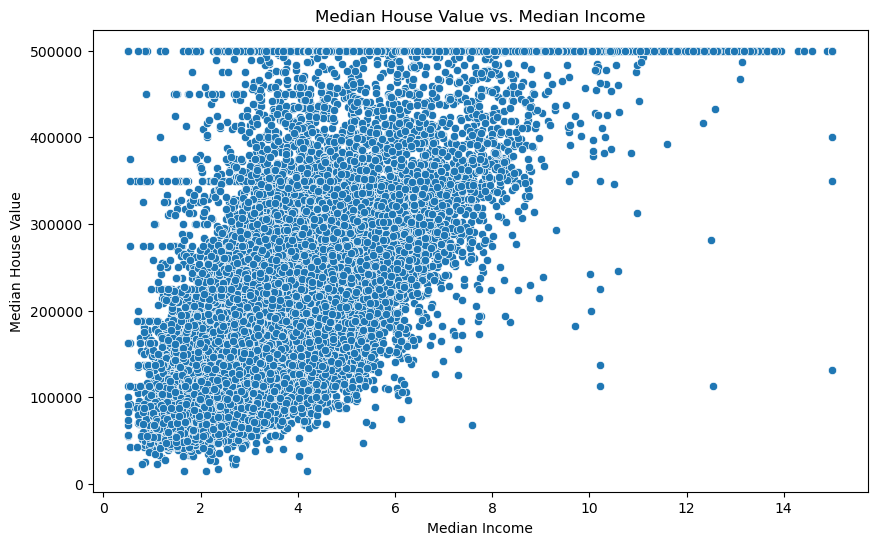

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data, x='median_income', y='median_house_value')
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

This graph shows a clear positive trend between median income and house value. As income increases, the value of houses also tends to be higher. It shows a strong relationship between the economic status of an area and its housing market.

2. Scatter plot for Median House Value vs. Population

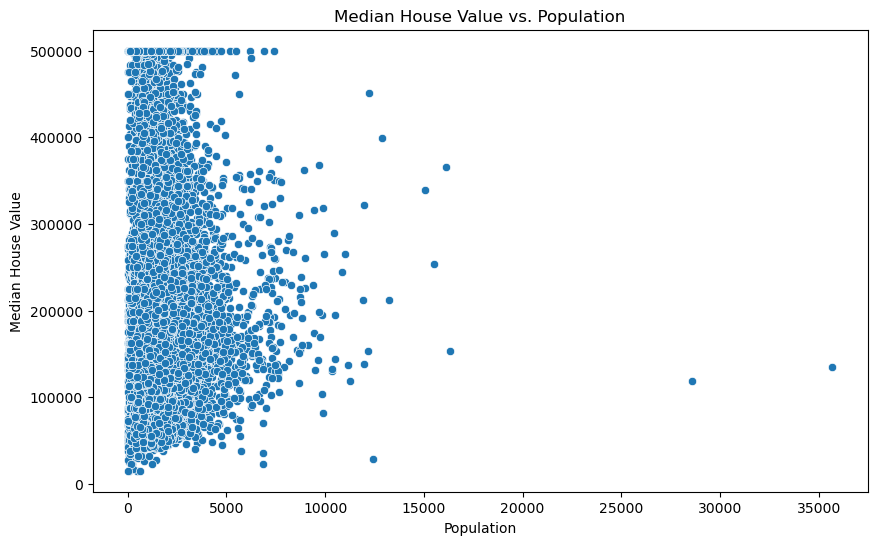

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data, x='population', y='median_house_value')
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

The relationship between population and median house value is less clear. There seems to be a wide distribution of house values across different population sizes.

3. Scatter plot for Median House Value vs. Number of Households

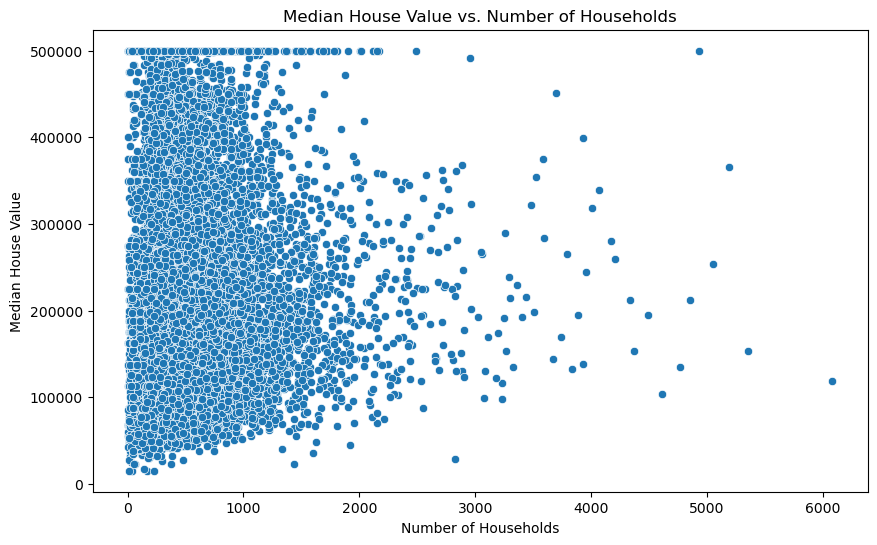

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data, x='households', y='median_house_value')
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()

Similar to the population, the number of households does not show a clear linear relationship with median house value. The data points are widely spread.

# 4. Running the Linear Regressions

We perform linear regression analysis to understand the relationship between median house value and each of the three variables: median income, population, and number of households. For each analysis, we use the `LinearRegression` model from `scikit-learn`.

In [58]:
# Function to run linear regression
def run_linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    return model, model.intercept_, model.coef_[0], mse, mae

In [59]:
X_median_income = housing_data[['median_income']]
X_population = housing_data[['population']]
X_households = housing_data[['households']]
y = housing_data['median_house_value']

# Running linear regression for each independent variable
income_model, income_intercept, income_slope, income_mse, income_mae = run_linear_regression(X_median_income, y)
population_model, population_intercept, population_slope, population_mse, population_mae = run_linear_regression(X_population, y)
households_model, households_intercept, households_slope, households_mse, households_mae = run_linear_regression(X_households, y)

# 5. Summary of the models

In [60]:
#Creating a Dataframe for the summary
summary_df = pd.DataFrame({
    'Variable': ['Median Income', 'Population', 'Number of Households'],
    'Intercept': [income_intercept, population_intercept, households_intercept],
    'Slope': [income_slope, population_slope, households_slope],
    'MSE': [income_mse, population_mse, households_mse],
    'MAE': [income_mae, population_mae, households_mae]
})

#Displaying the Dataframe
summary_df

,Variable,Intercept,Slope,MSE,MAE
0,Median Income,45085.576703,41793.849202,7.011312e+09,62625.933791
1,Population,210436.262076,-2.511753,1.330741e+10,91153.820095
2,Number of Households,196928.577162,19.872775,1.325778e+10,90802.743243


# 6. Plotting the Regression Lines

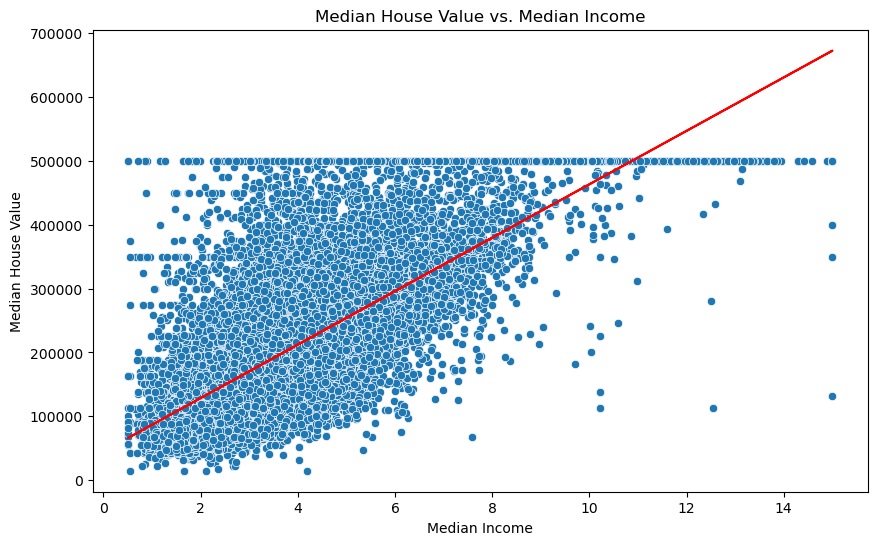

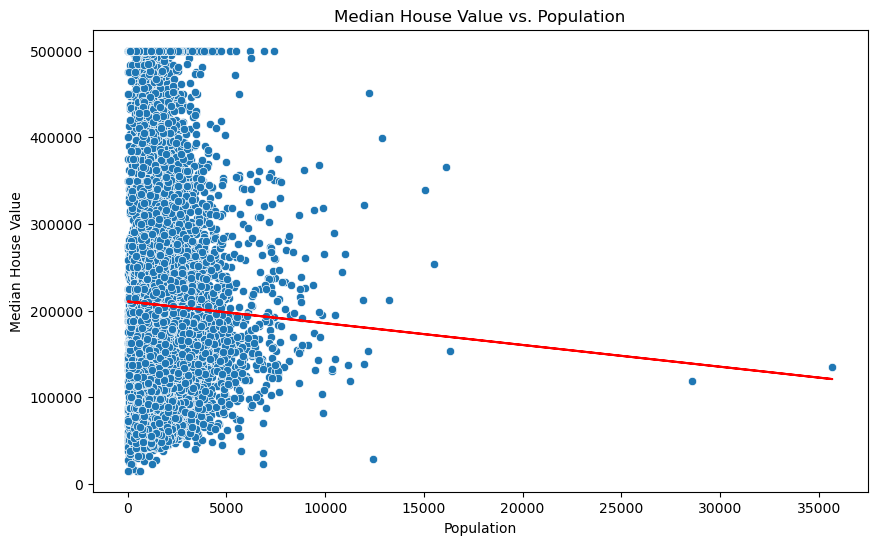

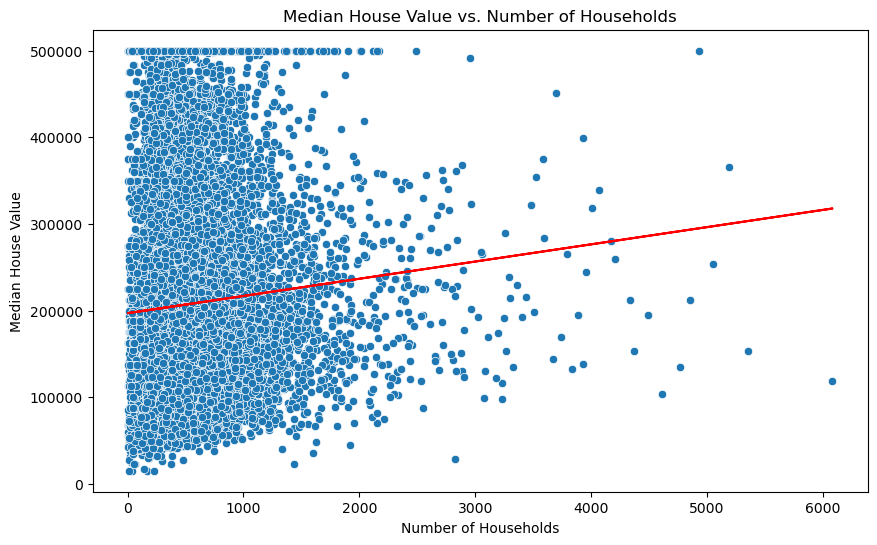

In [61]:
#Function to plot regression line
def plot_regression_line(X, y, model, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=y)
    plt.plot(X, model.intercept_ + model.coef_[0] * X, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

#Plotting regression lines
plot_regression_line(X_median_income, y, income_model, 'Median House Value vs. Median Income', 'Median Income', 'Median House Value')
plot_regression_line(X_population, y, population_model, 'Median House Value vs. Population', 'Population', 'Median House Value')
plot_regression_line(X_households, y, households_model, 'Median House Value vs. Number of Households', 'Number of Households', 'Median House Value')

# 7. Conclusion

- The model for median income shows the strongest positive relationship with median house value, indicating that income is a significant predictor of housing prices.
- The models for population and number of households do not show a clear linear relationship with median house value. The negative slope for population and the dispersed data points suggest that these factors alone are not strong predictors of house value.
- The goodness-of-fit for the median income model is higher compared to the other two models, as seen in the scatter plot with the regression line.